In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/tmp/learn_log", sep='\t', names=
                     ['learner', 'tick', 'action_id', 'learner_id', 'loss', 'dL_dy', 'updated_score',
                     'truth_estimate',
                     'reward'])

In [3]:
df

,learner,tick,action_id,learner_id,loss,dL_dy,updated_score,truth_estimate,reward
0,learner,101,WorkAction,3,350.469595,-37.441666,-0.427569,18.293264,11.0
1,learner,101,WorkAction,3,519.754649,-45.596256,-0.426569,22.371559,1.0
2,learner,101,AskAction,1,18.423716,-8.584571,-0.609665,3.682620,0.0
3,learner,101,GiveAction,0,400.819496,-40.040954,-0.872891,19.147586,-10.0
4,learner,101,AskAction,1,50.810043,-14.256233,-0.608665,6.519451,0.0
...,...,...,...,...,...,...,...,...,...
251156,learner,10000,WorkAction,3,0.270045,-1.039318,9.949776,10.469435,1.0
251157,learner,10000,WorkAction,3,0.002624,-0.102442,9.949822,10.001044,1.0
251158,learner,10000,WorkAction,3,2.461011,3.137522,9.949867,8.381105,1.0
251159,learner,10000,WorkAction,3,0.006817,0.165133,9.949846,9.867279,1.0


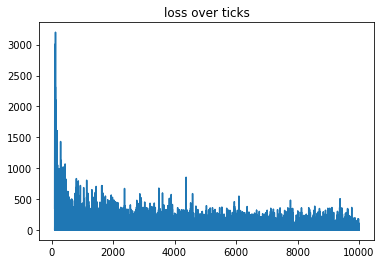

In [4]:
plt.plot(df['tick'], df['loss'])
#plt.yscale('log')
#plt.xlim(right=2000)
plt.title('loss over ticks')
plt.show()

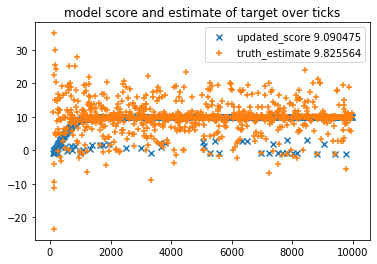

In [16]:
s = df.sample(1000)
plt.scatter(s['tick'], s['updated_score'], marker='x')
plt.scatter(s['tick'], s['truth_estimate'], marker='+')
plt.title('model score and estimate of target over ticks')
plt.legend(["updated_score %f" % (s['updated_score'].mean()), "truth_estimate %f" % (s['truth_estimate'].mean())])
plt.show()

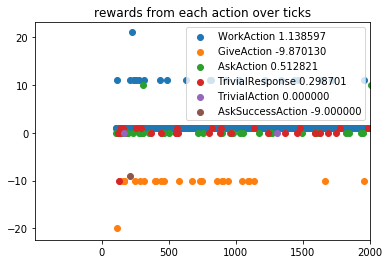

In [18]:
s = df.sample(5000)
actions = s['action_id'].unique()
for action in actions:
    plt.scatter(s.loc[df['action_id'] == action]['tick'], s.loc[df['action_id'] == action]['reward'])
plt.xlim(right=2000)
plt.legend(["%s %f" % (action, s.loc[df['action_id'] == action]['reward'].mean()) for action in actions])
plt.title('rewards from each action over ticks')
plt.show()

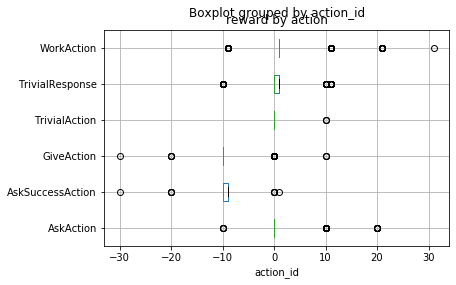

In [13]:
df.boxplot(column='reward', by='action_id', vert=False)
plt.title('reward by action')
plt.show()

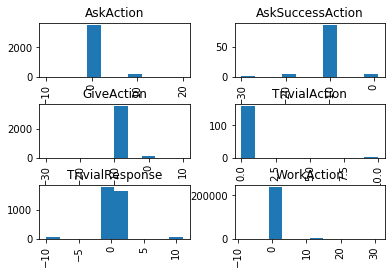

In [15]:
df['reward'].hist(by=df['action_id'])
plt.show()

In [8]:
df.groupby('action_id').count()

,learner,tick,learner_id,loss,dL_dy,updated_score,truth_estimate,reward
action_id,,,,,,,,
AskAction,3664,3664,3664,3664,3664,3664,3664,3664
AskSuccessAction,96,96,96,96,96,96,96,96
GiveAction,3688,3688,3688,3688,3688,3688,3688,3688
TrivialAction,161,161,161,161,161,161,161,161
TrivialResponse,3565,3565,3565,3565,3565,3565,3565,3565
WorkAction,239987,239987,239987,239987,239987,239987,239987,239987


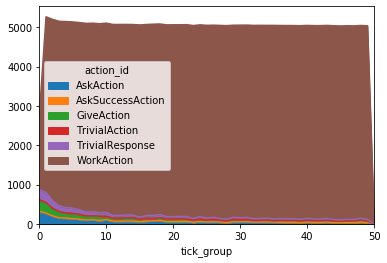

In [9]:
df['tick_group'] = df.apply(lambda row: int(row['tick']/200), axis=1)
pivot = df.pivot_table(values='tick', index='tick_group', columns='action_id', aggfunc=pd.Series.count)
pivot.plot(kind='area')

In [12]:
pivot.tail()

action_id,AskAction,AskSuccessAction,GiveAction,TrivialAction,TrivialResponse,WorkAction
tick_group,,,,,,
46,37.0,1.0,40.0,1.0,36.0,4922.0
47,33.0,NaN,44.0,2.0,33.0,4921.0
48,44.0,NaN,57.0,NaN,44.0,4899.0
49,35.0,NaN,40.0,NaN,35.0,4925.0
50,NaN,NaN,NaN,NaN,NaN,25.0
